# PTT 中文語料

@Justin Yang

嗨，這裡是 PTT 中文語料集，蒐集自 PTT 八卦版於 2015 年至 2017 年 6 月的文章，我透過[某些假設與方法](https://github.com/zake7749/PTT-Chat-Generator)將每篇文章化簡為問答配對，其中問題來自文章的標題，而回覆是該篇文章的推文。
不過目前這份資料集的噪聲還有點大，如果您發現有更棒的問答配對提取方法，還請與我聯繫。接下來我會簡單的說明一下這份資料集的資訊，祝各位開發順利 :>

## 資料格式

資料集中每一行都是一個問答配對，問與答之間以一個 tab (`\t`) 區隔開，比如說:

```
matlab有什麼炫砲一點的圖？	一樣的圖改一改顏色，有點半透明感覺更唬爛炫
有沒有情人節吃什麼cp值最高的八卦	吃屎啊廢話 免費的一餐
姆咪一個人守得住街亭嗎?	引來一堆肥宅穢土轉生 有機會喔
有沒有被落石砸到該反省的八卦	蔡英文執政就故意誇大報導 東森不意外
情人節該帶女朋友去哪慶祝？	用了一整年 對她好一點  送專業乾洗店吧
```

In [1]:
# a simple demo for loading dataset.

qa_pairs = []

with open('data/Gossiping-QA-Dataset.txt', 'r', encoding='utf-8') as dataset:
    for line in dataset:
        line = line.strip('\n')
        q,a = line.split('\t')
        qa_pairs.append([q,a])
print("問答配對筆數:",len(qa_pairs))

問答配對筆數: 418202


## 探索資料集

In [3]:
# randomly print the qa pairs
import random

for i in range(5):
    idx = random.randint(0, len(qa_pairs))
    print("Q:", qa_pairs[idx][0])
    print("A:", qa_pairs[idx][1])

Q: 有沒有桶仔雞的八卦?
A: 裡面其實不是雞肉喔，嘻嘻嘻~~~
Q: 新垣結衣吃晚餐
A: 醒醒好嗎?   我去問問
Q: 有沒有圖書館唸書的八掛？
A: 暑假去圖書館還有在裡面睡覺在椅子或沙發上的
Q: 鍋貼要吃八方雲集還是四海遊龍
A: 當然是四海遊龍 每比一次國際賽事吃一次
Q: 有沒有男生比較容易維持體態的八卦？
A: 女生可以靠少吃維持體態 男生沒辦法 有工作更難


In [4]:
# plot the distribution of sentences' length.

from collections import defaultdict
from matplotlib import pyplot as plt

q_lens = defaultdict(int)
a_lens = defaultdict(int)
total_lens = defaultdict(int)

for q,a in qa_pairs:
    
    length_q = len(q)
    length_a = len(a)
    
    q_lens[length_q] += 1
    a_lens[length_a] += 1
    
    total_lens[length_q] += 1
    total_lens[length_a] += 1

In [5]:
def plot_distribution(ctr, title):
    
    plt.bar(range(len(ctr)), ctr.values(), align='center')
    plt.title(title)
    plt.xticks(range(len(ctr)), ctr.keys())
    plt.show()

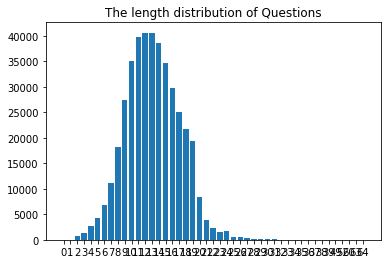

In [6]:
plot_distribution(q_lens, "The length distribution of Questions")

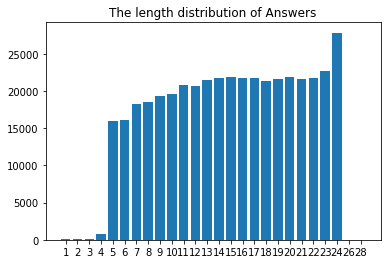

In [7]:
plot_distribution(a_lens, "The length distribution of Answers")

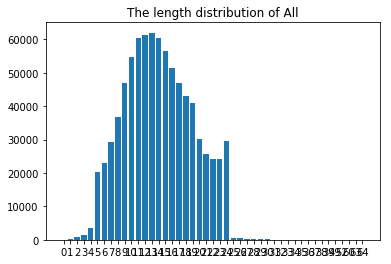

In [8]:
plot_distribution(total_lens, "The length distribution of All")

In [9]:
# show the number of questions which do not have any reply.

nb_no_reply = 0

for q,a in qa_pairs:
    if a == '沒有資料':
        nb_no_reply += 1
print("# Question without reply", nb_no_reply)

# Question without reply 650
